In [56]:
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [57]:
import platform
import matplotlib as mpl
from matplotlib import font_manager, rc

system = platform.system()
if system == "Windows":
    font_path = "C:/Windows/Fonts/malgun.ttf"
elif system == "Darwin":
    font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
elif system == "Linux":
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
else:
    font_path = None

if font_path:
    font = font_manager.FontProperties(fname=font_path).get_name()
    mpl.rcParams['font.family'] = font
else:
    print("폰트 경로를 확인해주세요.")

mpl.rcParams['axes.unicode_minus'] = False

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
food_data = pd.read_csv('./data/서울특별시_일반음식점.csv',encoding='cp949')
food_data

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472910,472911,일반음식점,07_24_04_P,3220000,3220000-101-2021-00112,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,18.00,NaN,NaN,NaN,NaN
472911,472912,일반음식점,07_24_04_P,3220000,3220000-101-2021-00113,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,13.86,NaN,NaN,NaN,NaN
472912,472913,일반음식점,07_24_04_P,3220000,3220000-101-2021-00114,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,14.15,NaN,NaN,NaN,NaN
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,75.60,NaN,NaN,NaN,NaN


In [60]:
food_data.set_index('영업상태명',inplace=True)

In [61]:
food_data
food_data.drop(['폐업'],axis=0, inplace=True)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,상세영업상태명,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
영업상태명,,,,,,,,,,,,,,,,,,,,,
영업/정상,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
영업/정상,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
영업/정상,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,1,영업,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
영업/정상,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
영업/정상,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
폐업,472911,일반음식점,07_24_04_P,3220000,3220000-101-2021-00112,20210202,NaN,3,2,폐업,...,0.0,NaN,0.0,0.0,N,18.00,NaN,NaN,NaN,NaN
폐업,472912,일반음식점,07_24_04_P,3220000,3220000-101-2021-00113,20210202,NaN,3,2,폐업,...,0.0,NaN,0.0,0.0,N,13.86,NaN,NaN,NaN,NaN
폐업,472913,일반음식점,07_24_04_P,3220000,3220000-101-2021-00114,20210202,NaN,3,2,폐업,...,0.0,NaN,0.0,0.0,N,14.15,NaN,NaN,NaN,NaN


In [62]:
food_data

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,상세영업상태명,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
영업상태명,,,,,,,,,,,,,,,,,,,,,
영업/정상,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
영업/정상,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
영업/정상,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,1,영업,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
영업/정상,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
영업/정상,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
영업/정상,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN
영업/정상,124205,일반음식점,07_24_04_P,3080000,3080000-101-2021-00016,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,66.91,NaN,NaN,NaN,NaN
영업/정상,124206,일반음식점,07_24_04_P,3070000,3070000-101-2021-00023,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,45.91,NaN,NaN,NaN,NaN


In [63]:
food_data.set_index('위생업태명',inplace=True,drop=False)  ### drop 함으로써 원래 열은 유지
food_data

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,상세영업상태명,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
위생업태명,,,,,,,,,,,,,,,,,,,,,
한식,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
한식,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
한식,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,1,영업,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
한식,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
일식,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
호프/통닭,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN
기타,124205,일반음식점,07_24_04_P,3080000,3080000-101-2021-00016,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,66.91,NaN,NaN,NaN,NaN
일식,124206,일반음식점,07_24_04_P,3070000,3070000-101-2021-00023,20210122,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,45.91,NaN,NaN,NaN,NaN


In [64]:
sna = food_data.loc['분식']
sna

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,상세영업상태명,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
위생업태명,,,,,,,,,,,,,,,,,,,,,
분식,7,일반음식점,07_24_04_P,3040000,3040000-101-2020-00273,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,15.39,NaN,NaN,NaN,NaN
분식,11,일반음식점,07_24_04_P,3110000,3110000-101-2020-00282,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,56.84,NaN,NaN,NaN,NaN
분식,12,일반음식점,07_24_04_P,3110000,3110000-101-2020-00283,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,59.17,NaN,NaN,NaN,NaN
분식,13,일반음식점,07_24_04_P,3220000,3220000-101-2020-00857,20200803,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,30.00,NaN,NaN,NaN,NaN
분식,28,일반음식점,07_24_04_P,3120000,3120000-101-1977-01871,19770609,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,251.19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
분식,124141,일반음식점,07_24_04_P,3040000,3040000-101-2021-00041,20210201,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,15.00,NaN,NaN,NaN,NaN
분식,124160,일반음식점,07_24_04_P,3200000,3200000-101-2021-00063,20210202,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,27.00,NaN,NaN,NaN,NaN
분식,124174,일반음식점,07_24_04_P,3200000,3200000-101-2020-00628,20201209,NaN,1,1,영업,...,NaN,NaN,NaN,NaN,N,29.70,NaN,NaN,NaN,NaN


In [65]:
sna.set_index('소재지전체주소',inplace=True,drop=False)

In [66]:
new_sna = sna[sna["소재지전체주소"].str.contains("영등포구",na=False)]

In [67]:
def get_dong(tmp):
    for add in tmp.split(" "):
        if "동" in add:
            return add

In [68]:
new_sna["소재지전체주소"]

소재지전체주소
서울특별시 영등포구 대림동 12-3번지 3-1주거환            서울특별시 영등포구 대림동 12-3번지 3-1주거환
서울특별시 영등포구 당산동5가 16-7번지 아울렛2001      서울특별시 영등포구 당산동5가 16-7번지 아울렛2001
서울특별시 영등포구 당산동3가 396-3번지                    서울특별시 영등포구 당산동3가 396-3번지
서울특별시 영등포구 여의도동 43-0번지 미원빌딩 120호    서울특별시 영등포구 여의도동 43-0번지 미원빌딩 120호
서울특별시 영등포구 영등포동8가 80-2번지                    서울특별시 영등포구 영등포동8가 80-2번지
                                                  ...               
서울특별시 영등포구 대림동 778-13                          서울특별시 영등포구 대림동 778-13
서울특별시 영등포구 문래동4가 10-9                          서울특별시 영등포구 문래동4가 10-9
서울특별시 영등포구 신길동 1300                              서울특별시 영등포구 신길동 1300
서울특별시 영등포구 신길동 3813                              서울특별시 영등포구 신길동 3813
서울특별시 영등포구 신길동 240-16 힐스테이트 클래시안    서울특별시 영등포구 신길동 240-16 힐스테이트 클래시안
Name: 소재지전체주소, Length: 592, dtype: object

In [69]:
new_sna["동"] = new_sna["소재지전체주소"].apply(get_dong)

In [70]:
new_sna

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,상세영업상태명,...,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47,동
소재지전체주소,,,,,,,,,,,,,,,,,,,,,
서울특별시 영등포구 대림동 12-3번지 3-1주거환,48,일반음식점,07_24_04_P,3180000,3180000-101-1995-04053,19950323,NaN,1,1,영업,...,NaN,0.0,0.0,N,24.79,NaN,NaN,NaN,NaN,대림동
서울특별시 영등포구 당산동5가 16-7번지 아울렛2001,69,일반음식점,07_24_04_P,3180000,3180000-101-1995-03903,19950704,NaN,1,1,영업,...,NaN,0.0,0.0,N,10.50,NaN,NaN,NaN,NaN,당산동5가
서울특별시 영등포구 당산동3가 396-3번지,126,일반음식점,07_24_04_P,3180000,3180000-101-1995-00025,19950614,NaN,1,1,영업,...,NaN,0.0,0.0,N,22.32,NaN,NaN,NaN,NaN,당산동3가
서울특별시 영등포구 여의도동 43-0번지 미원빌딩 120호,197,일반음식점,07_24_04_P,3180000,3180000-101-1995-03879,19950712,NaN,1,1,영업,...,NaN,0.0,0.0,N,69.00,NaN,NaN,NaN,NaN,여의도동
서울특별시 영등포구 영등포동8가 80-2번지,204,일반음식점,07_24_04_P,3180000,3180000-101-1984-04927,19841112,NaN,1,1,영업,...,NaN,0.0,0.0,N,23.98,NaN,NaN,NaN,NaN,영등포동8가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서울특별시 영등포구 대림동 778-13,122433,일반음식점,07_24_04_P,3180000,3180000-101-2020-00637,20201222,NaN,1,1,영업,...,NaN,0.0,0.0,N,49.00,NaN,NaN,NaN,NaN,대림동
서울특별시 영등포구 문래동4가 10-9,123005,일반음식점,07_24_04_P,3180000,3180000-101-2020-00566,20201123,NaN,1,1,영업,...,NaN,0.0,0.0,Y,140.17,NaN,NaN,NaN,NaN,문래동4가
서울특별시 영등포구 신길동 1300,123015,일반음식점,07_24_04_P,3180000,3180000-101-2021-00057,20210202,NaN,1,1,영업,...,NaN,0.0,0.0,N,33.59,NaN,NaN,NaN,NaN,신길동


32

([<matplotlib.patches.Wedge at 0x242cfac6d50>,
 [Text(0.8372042978007916, 0.7135047047804826, '대림동'),
  Text(-0.40471993594008254, 1.0228400527221526, '당산동5가'),
  Text(-1.0483055838224777, 0.33324976057998007, '당산동3가'),
  Text(-1.07770976700609, -0.22032171499804443, '여의도동'),
  Text(-0.9603156704695155, -0.5364641768568383, '영등포동8가'),
  Text(-0.7778173279449521, -0.7778175906654303, '신길동'),
  Text(-0.5717591258355982, -0.939729483427924, '당산동6가'),
  Text(-0.3498960988254197, -1.0428675467319675, '영등포동3가'),
  Text(-0.1455076086619962, -1.0903336809534352, '영등포동5가'),
  Text(0.017511976252334433, -1.099860596024668, '도림동'),
  Text(0.16284675124719852, -1.087879099720292, '영등포동2가'),
  Text(0.29408746660580554, -1.0599587548510458, '양평동4가'),
  Text(0.4155530009605227, -1.0184869677088186, '양평동2가'),
  Text(0.5313613657683837, -0.9631485342192855, '문래동1가'),
  Text(0.6351775946868016, -0.898080966955591, '당산동2가'),
  Text(0.7267427036970359, -0.8257390887096979, '양평동1가'),
  Text(0.8061680886863

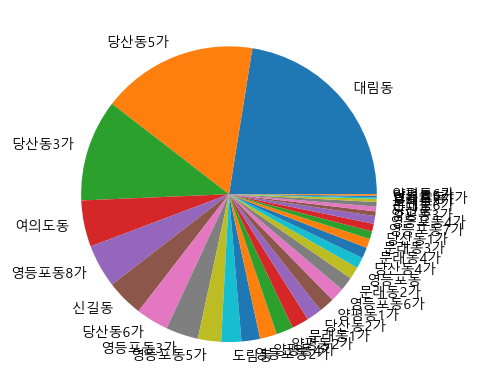

In [74]:
cou = new_sna['동'].value_counts()
#new_sna.set_index('동',inplace=True,drop=False)
i = len(new_sna['동'].unique())
i
# explode = [0.1 for _ in range(i)]
# explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
plt.pie(cou, labels=new_sna['동'].unique())
plt.show()

<BarContainer object of 32 artists>

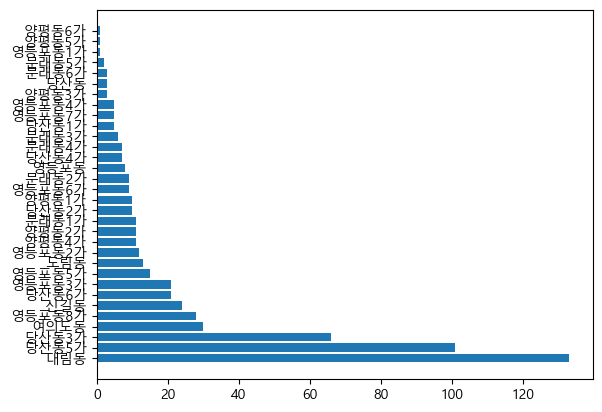

In [78]:
index = np.arange(i)
plt.barh(index,cou,tick_label=new_sna['동'].unique())
plt.show()

In [13]:
sna.index[]

SyntaxError: invalid syntax (1293017115.py, line 1)

In [56]:
# sna.loc['서울특별시 영등포구']

In [52]:
# if sna.loc[]!='서울특별시 영등포구':
#     del sna.index()
########## if문 써보려다 망함